In [7]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [8]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [9]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [10]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [11]:
ALG = TEASER_S

# L2_1 = [10 ** p for p in range(2, 8)]
# L2_2 = [10 ** p for p in range(2, 8)]

L2_1 = [500, 1000, 2000, 5000]
L2_2 = [50000, 100000, 200000, 500000]
# RHO = 0
RHO = [100, 500, 1000]
DELTA = 0
MAX_ITER = 10
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [500, 1000, 2000, 5000],
 'l2_2': [50000, 100000, 200000, 500000],
 'rho': [100, 500, 1000],
 'delta': 0,
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [21]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [25]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [26]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000, 'rho': 500, 'delta': 0, 'max_iterations': 20}
Decompose DTD


norm E 2032.7137636169657
loss 325881940009.2959
diag norm: 361.37895110833176
diag_diff: 384.5323708144667

norm E 221875.06485964736
loss 4012517331647385.5
diag norm: 42581.98541866277
diag_diff: 43750.04542059066
rho * change E: 111743403.7231673

norm E 28496365.929957397
loss 6.621445156343047e+19
diag norm: 5487049.468130213
diag_diff: 5717677.402176227
rho * change E: 14358880546.534128

norm E 3715038326.9180984
loss 1.1252435298840142e+24
diag norm: 715450762.9103242
diag_diff: 734979049.9573498
rho * change E: 1871766869665.07

norm E 479404241758.61993
loss 1.8739521146853874e+28
diag norm: 92288424934.1264
diag_diff: 96159424639.96298
rho * change E: 241559626875749.62

norm E 62482519995541.84
loss 3.1830103498866958e+32
diag norm: 12032840109811.898
diag_diff: 12361224223154.484
rho * change E: 3.1480960969592124e+16

norm E 8062731123451430.0
loss 5.300526673349103e+36
diag norm: 1552154764194627.0
diag_diff: 1617254515268180.5
rho * change E: 4.0626066965159916e+18

no

/home/joey/Documents/Informatica/PhD/2020-2021/SI EDLAE/Code/teaser/evaluation.py:44: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg / idcg


Evaluating with 10000 users
Average Recall@20 0.04046
Average Recall@100 0.13882
Average nDCG@100 0.04891
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 500, 'delta': 0, 'max_iterations': 20}
Decompose DTD


norm E 1.681564262478703
loss 155100194.7133424
diag norm: 0.8008054956138992
diag_diff: 0.830424066282658

norm E 1.6772601854725981
loss 155032853.41331878
diag norm: 0.7421900368640271
diag_diff: 0.7883595669388102
rho * change E: 18.367905871996296

norm E 1.6739716952220338
loss 154969945.26064336
diag norm: 0.692692039547355
diag_diff: 0.7487309673305427
rho * change E: 12.596490901358395

norm E 1.671220155850787
loss 154910989.72862166
diag norm: 0.6496115109557329
diag_diff: 0.7113167174256491
rho * change E: 9.577277229116046

norm E 1.6688140051287716
loss 154855673.72839656
diag norm: 0.6114069627968485
diag_diff: 0.6759233932922083
rho * change E: 7.686323032746929

norm E 1.6666565357135967
loss 154803724.02772507
diag norm: 0.5771024748517724
diag_diff: 0.6424500508956664
rho * change E: 6.394114867360029

norm E 1.6646914252903475
loss 154754874.85525182
diag norm: 0.5459819291324841
diag_diff: 0.6107217868363612
rho * change E: 5.464594751823139

norm E 1.6628838627189

KeyboardInterrupt: 

In [ ]:
f"Best score of {score} achieved with {best_hyperparams}."

## Evaluate model with optimal hyperparams on test set

In [19]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.1601195859017804
norm D 160.42341645437625
diag_diff: 0.4460087384978431

norm E 0.14425800674795367
norm D 160.42341645437625
diag_diff: 0.4254625108649402
rho * change E: 4.755322832642293
rho changed 50.0

norm E 0.14026708771463073
norm D 160.42341645437625
diag_diff: 0.42157448971515016
rho * change E: 0.7421303904021302

norm E 0.13880463144690305
norm D 160.42341645437625
diag_diff: 0.4127338506065089
rho * change E: 0.36441852953695203

norm E 0.13766120734629242
norm D 160.42341645437625
diag_diff: 0.40424536076950324
rho * change E: 0.16812002392615077

norm E 0.13658998501517497
norm D 160.42341645437625
diag_diff: 0.3960196981273356
rho * change E: 0.09626062578776058

norm E 0.1355451326937369
norm D 160.42341645437625
diag_diff: 0.38802159850005513
rho * change E: 0.07141780569091834

norm E 0.1345168542144064
norm D 160.42341645437625
diag_diff: 0.3802340891928984
rho * change E: 0.06343128992593738

norm E 0.13350281904152436
norm D 160.42341645437625
diag_diff

In [24]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
dcg [0.         1.         1.63092975 ... 0.         0.         0.        ]
idcg [2.56160631 1.         1.63092975 ... 0.         0.         0.        ]
ndcg [0. 1. 1. ... 0. 0. 0.]
Evaluating with 1500 users
Average Recall@20 0.10262
Average Recall@100 0.14667
Average nDCG@100 0.08792


/home/joey/Documents/Informatica/PhD/2020-2021/SI EDLAE/Code/teaser/evaluation.py:47: RuntimeWarning: invalid value encountered in true_divide
  


## Plot amount of items from long tail recommended

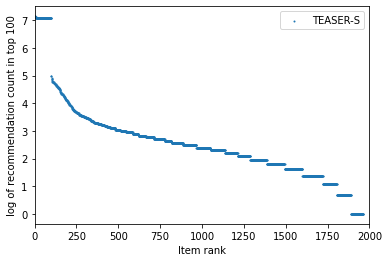

In [25]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)